In [2]:
import lmfit as lm
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from acoustic_resonators.stroboscopy.config import paths
from scipy.special import erf

# 19.09.2019

## 666 nm (THG 2 um)

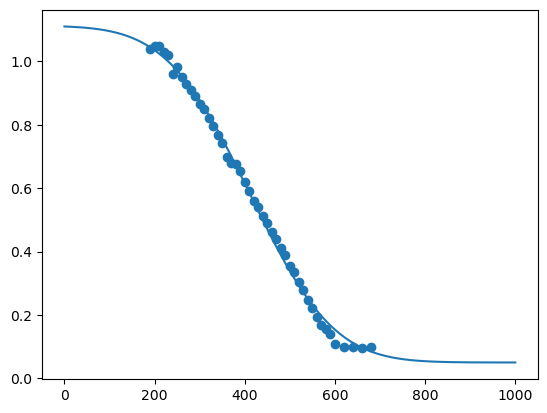

sigma = 205.63


In [23]:
knifeedge_data = pl.read_csv(
    paths.raw_data / "09.09.19/090919_beam_calibration_666nm.csv"
).with_columns((pl.col("Knob position") * 10).alias("Distance (um)"))


def knife_edge(x, amplitude, center, sigma, offset):
    alpha = (x - center) / sigma
    return amplitude * (1 - erf(alpha)) / 2 + offset


model = lm.Model(knife_edge)
params = model.make_params(amplitude=1, center=400, sigma=200, offset=0.1)
params["offset"].set(value=0.05, vary=0)

result = model.fit(knifeedge_data["Power"], params, x=knifeedge_data["Distance (um)"])

plt.scatter(knifeedge_data["Distance (um)"], knifeedge_data["Power"])

x = np.linspace(0, 1000, 1000)
plt.plot(x, result.eval(x=x))
plt.show()

print(f"sigma = {result.params["sigma"].value :.2f}")

## 550 nm

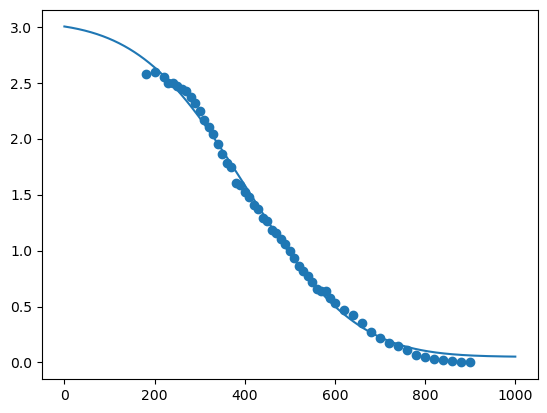

sigma = 266.11


In [24]:
knifeedge_data = pl.read_csv(
    paths.raw_data / "09.09.19/090919_beam_calibration_550nm.csv"
).with_columns((pl.col("Knob position") * 10).alias("Distance (um)"))


def knife_edge(x, amplitude, center, sigma, offset):
    alpha = (x - center) / sigma
    return amplitude * (1 - erf(alpha)) / 2 + offset


model = lm.Model(knife_edge)
params = model.make_params(amplitude=1, center=400, sigma=200, offset=0.1)
params["offset"].set(value=0.05, vary=0)

result = model.fit(knifeedge_data["Power"], params, x=knifeedge_data["Distance (um)"])

plt.scatter(knifeedge_data["Distance (um)"], knifeedge_data["Power"])

x = np.linspace(0, 1000, 1000)
plt.plot(x, result.eval(x=x))
plt.show()

print(f"sigma = {result.params["sigma"].value :.2f}")

## 27.01.2020

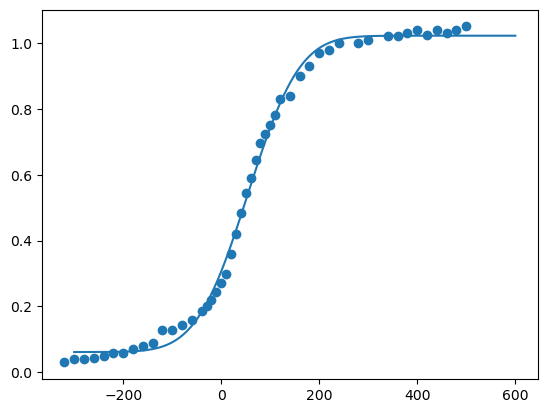

sigma = 116.89


In [22]:
knifeedge_data = pl.read_csv(
    paths.raw_data / "27.01.20/beam_calibration_640nm.csv", comment_prefix="#"
).select((pl.col("x") * 10).alias("Distance (um)"), pl.col("P").alias("Power"))


def knife_edge(x, amplitude, center, sigma, offset):
    alpha = (x - center) / sigma
    return amplitude * erf(alpha) + offset


model = lm.Model(knife_edge)
params = model.make_params(amplitude=1, center=0, sigma=100, offset=0)

result = model.fit(knifeedge_data["Power"], params, x=knifeedge_data["Distance (um)"])

plt.scatter(knifeedge_data["Distance (um)"], knifeedge_data["Power"])

x = np.linspace(-300, 600, 1000)
plt.plot(x, result.eval(x=x))
plt.show()

print(f"sigma = {result.params["sigma"].value :.2f}")